# Modeling

In [10]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from acquire import get_iris_data

### Exercise 1
- Clustering with the Iris Dataset    

In [3]:
iris = get_iris_data()

In [16]:
iris['petal_area'] = iris.petal_length * iris.petal_width
iris['sepal_area'] = iris.sepal_length * iris.sepal_width

In [17]:
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,petal_area,sepal_area
0,1,1,5.1,3.5,1.4,0.2,setosa,0.28,17.85
1,1,2,4.9,3.0,1.4,0.2,setosa,0.28,14.70
2,1,3,4.7,3.2,1.3,0.2,setosa,0.26,15.04
3,1,4,4.6,3.1,1.5,0.2,setosa,0.30,14.26
4,1,5,5.0,3.6,1.4,0.2,setosa,0.28,18.00


In [18]:
train_and_validate, test = train_test_split(iris, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.2, random_state=123)

In [19]:
train.shape, validate.shape, test.shape

((108, 9), (27, 9), (15, 9))

- Choose features other than the ones used in the lesson.
    - Visualize the results of your clustering.
    - Use the elbow method to visually select a good value for k.
    - Repeat the clustering, this time with 3 different features.

In [20]:
scaler = StandardScaler()
cols = ['petal_length', 'sepal_length', 'petal_width', 'sepal_width', 'petal_area', 'sepal_area']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

In [35]:
X1 = train_scaled[['petal_width', 'sepal_width']]

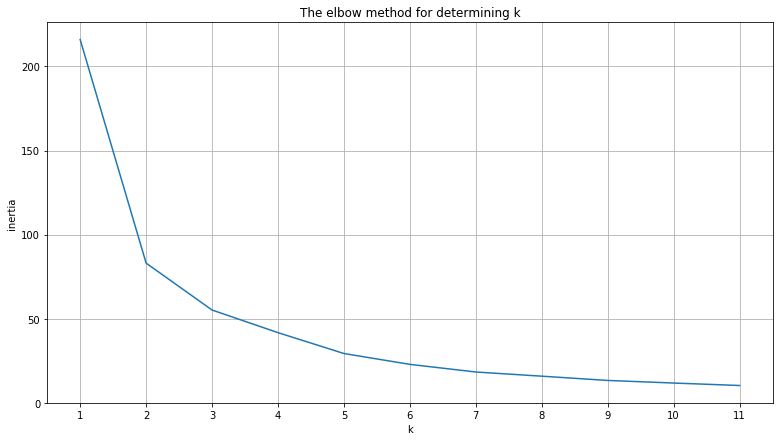

In [36]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X1)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

In [47]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X1)
train['cluster'] = kmeans.labels_

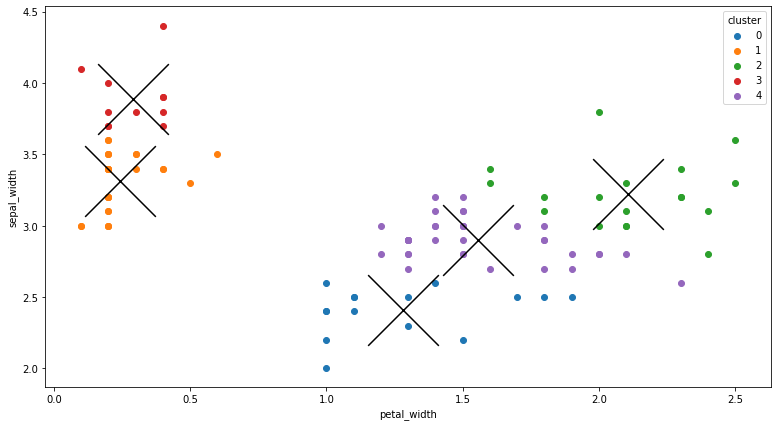

In [48]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.petal_width, subset.sepal_width, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='sepal width', xlabel='petal width')

train.groupby('cluster').mean().plot.scatter(y='sepal_width', x='petal_width', marker='x', s=5000, ax=ax, c='black')
plt.show()

In [49]:
X2 = train_scaled[['petal_length', 'petal_width']]

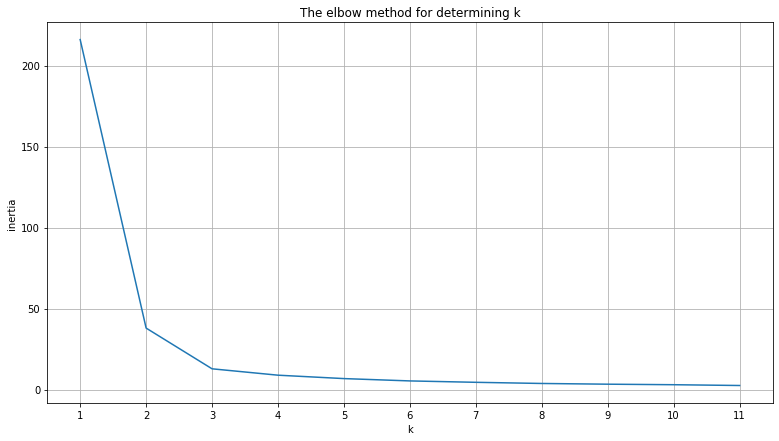

In [50]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X2)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

In [51]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X2)
train['cluster'] = kmeans.labels_

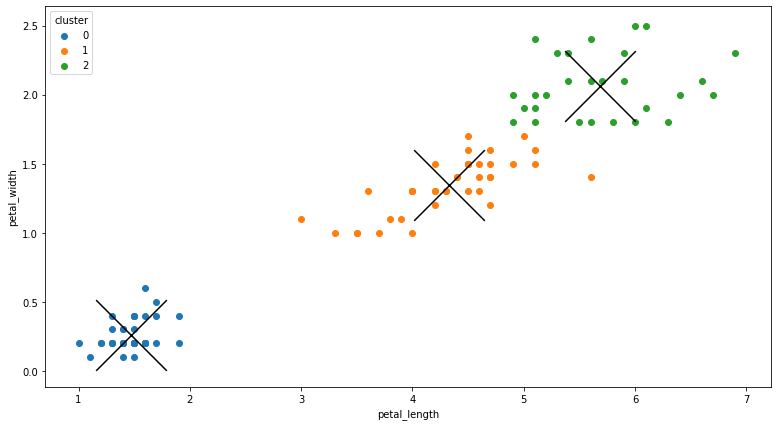

In [52]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.petal_length, subset.petal_width, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='petal width', xlabel='petal length')

train.groupby('cluster').mean().plot.scatter(y='petal_width', x='petal_length', marker='x', s=5000, ax=ax, c='black')
plt.show()

In [53]:
X3 = train_scaled[['petal_area', 'sepal_area']]

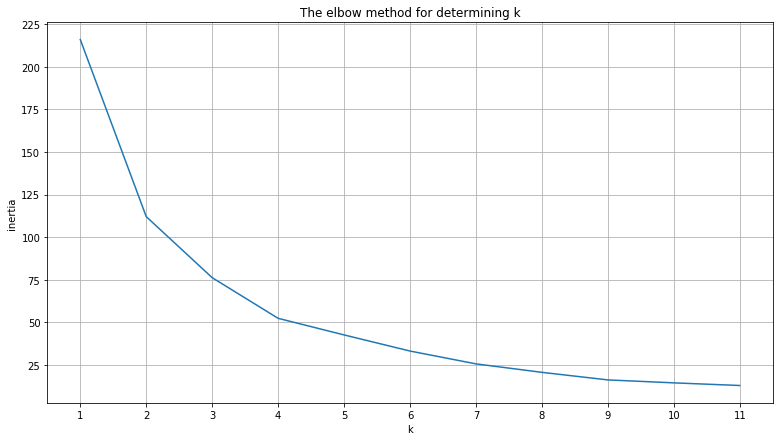

In [54]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X3)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X1)
train['cluster'] = kmeans.labels_

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.petal_area, subset.sepal_area, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='sepal area', xlabel='petal area')

train.groupby('cluster').mean().plot.scatter(y='sepal_length', x='petal_length', marker='x', s=5000, ax=ax, c='black')


### Exercise 2

- Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

### Exercise 3
- How does scaling impact the results of clustering?

    - Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.